# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Jihan Savira
- **Email:** mc589d5x2485@gmail.com
- **ID Dicoding:** mc589d5x2485

## Menentukan Pertanyaan Bisnis

Bagaimana performa jumlah penyewaan sepeda (cnt) dalam beberapa bulan terakhir? Apakah ada peningkatan atau penurunan?
Analisis yang Dibutuhkan:
•	Analisis tren jumlah penyewaan sepeda (cnt) per bulan (mnth) dalam dataset.
•	Visualisasi: Line chart atau bar chart untuk menunjukkan tren bulanan.
________________________________________
Musim apa yang paling banyak dan paling sedikit sepeda disewa?
Analisis yang Dibutuhkan:
•	Hitung total penyewaan sepeda (cnt) per musim (season).
•	Visualisasi: Bar chart atau pie chart untuk membandingkan jumlah penyewaan sepeda per musim.
________________________________________
Bagaimana profil pengguna sepeda? Apakah lebih banyak pengguna casual atau registered?
Analisis yang Dibutuhkan:
•	Bandingkan jumlah pengguna casual dan registered secara keseluruhan atau per musim.
•	Visualisasi: Stacked bar chart atau pie chart untuk membandingkan proporsi pengguna casual dan registered.
________________________________________
Apakah jumlah penyewaan sepeda berbeda pada hari libur dibandingkan hari biasa?
Analisis yang Dibutuhkan:
•	Bandingkan jumlah penyewaan sepeda (cnt) pada hari libur (holiday = 1) dan hari biasa (holiday = 0).
________________________________________
Kapan waktu dengan jumlah penyewaan sepeda tertinggi?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns



## Data Wrangling

### Gathering Data

In [3]:
import pandas as pd

# Gathering Data
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')




Shape of df_day: (731, 16)
Shape of df_hour: (17379, 17)**Insight:**


### Assessing Data

In [4]:
# Assessing Data
print("Info df_day:\n", df_day.info())
print("\nInfo df_hour:\n", df_hour.info())
print("\nMissing values di df_day:\n", df_day.isnull().sum())
print("\nMissing values di df_hour:\n", df_hour.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Info df_day:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 1737

### Cleaning Data

In [5]:
# Cleaning Data
# Ubah tipe data 'dteday' menjadi datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Gabungkan dataframe (jika diperlukan)
df_merged = pd.merge(df_day, df_hour, on='dteday', how='inner')

# Hapus duplikat data (jika ada)
df_day.drop_duplicates(inplace=True)
df_hour.drop_duplicates(inplace=True)
df_merged.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analisis Deskriptif
print("Statistik Deskriptif df_day:\n", df_day.describe())
print("\nStatistik Deskriptif df_hour:\n", df_hour.describe())



Statistik Deskriptif df_day:
           instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.0

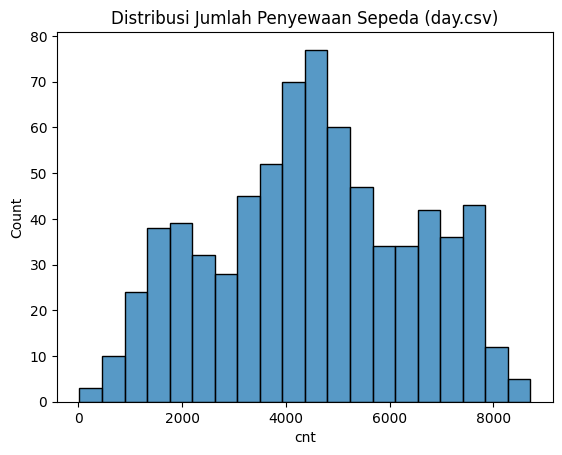

In [7]:
# Analisis Univariate
sns.histplot(df_day['cnt'], bins=20)
plt.title('Distribusi Jumlah Penyewaan Sepeda (day.csv)')
plt.show()



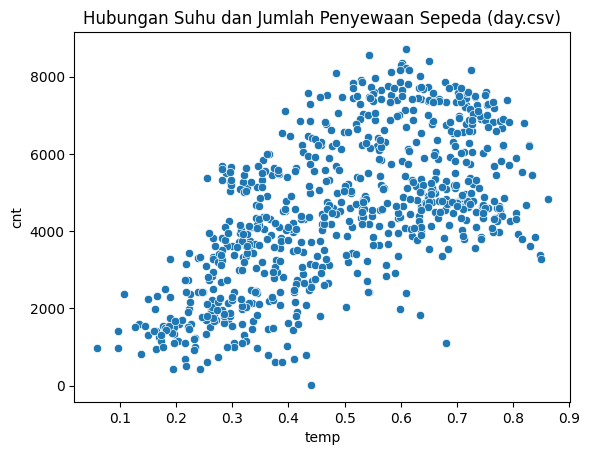

In [8]:
# Analisis Bivariate
sns.scatterplot(x='temp', y='cnt', data=df_day)
plt.title('Hubungan Suhu dan Jumlah Penyewaan Sepeda (day.csv)')
plt.show()

In [10]:
monthly_rentals = df_day.groupby('mnth')['cnt'].sum().reset_index() # Perbaikan di sini
print("\nJumlah penyewaan sepeda per bulan:\n", monthly_rentals)


Jumlah penyewaan sepeda per bulan:
     mnth     cnt
0      1  134933
1      2  151352
2      3  228920
3      4  269094
4      5  331686
5      6  346342
6      7  344948
7      8  351194
8      9  345991
9     10  322352
10    11  254831
11    12  211036


In [11]:
seasonal_temp = df_day.groupby('season')['temp'].mean().reset_index()
print("\nRata-rata suhu per musim:\n", seasonal_temp)


Rata-rata suhu per musim:
    season      temp
0       1  0.297748
1       2  0.544405
2       3  0.706309
3       4  0.422906


In [12]:
daily_users = df_day.groupby('weekday')[['casual', 'registered']].sum().reset_index()
print("\nJumlah pengguna casual dan registered per hari:\n", daily_users)


Jumlah pengguna casual dan registered per hari:
    weekday  casual  registered
0        0  140521      303506
1        1   70784      384719
2        2   57843      411266
3        3   57319      415729
4        4   61460      423935
5        5   78238      409552
6        6  153852      323955


## Visualization & Explanatory Analysis

### Pertanyaan 1:

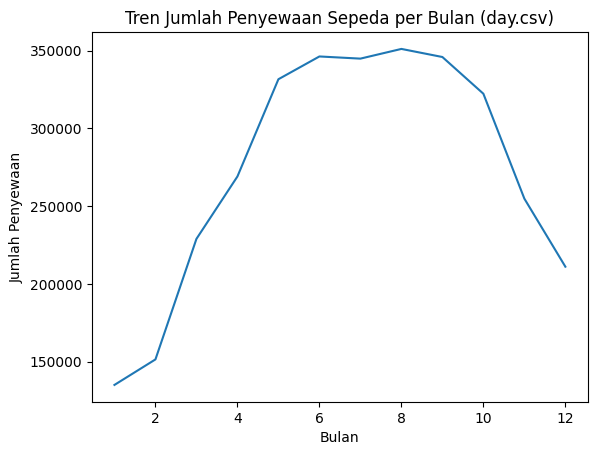

In [13]:
df_day.groupby('mnth')['cnt'].sum().plot(kind='line')
plt.title('Tren Jumlah Penyewaan Sepeda per Bulan (day.csv)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.show()

### Pertanyaan 2:

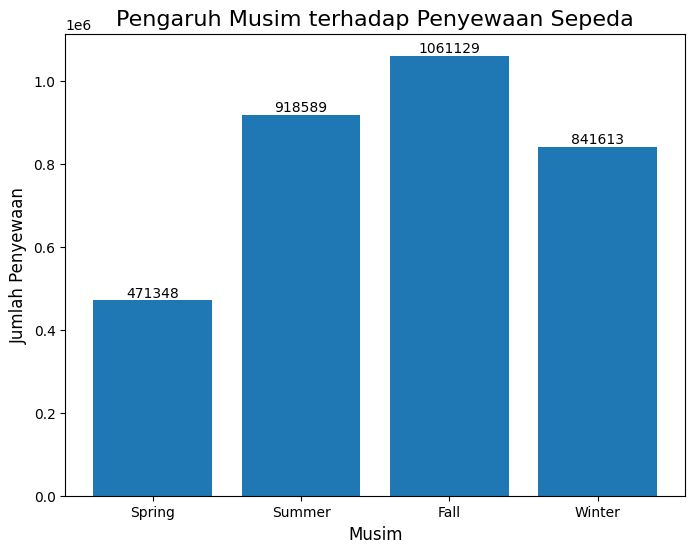

In [14]:
# Dataframe yang berisi data musim dan jumlah penyewaan
# (asumsi df_day adalah dataframe Anda)
musim_data = df_day.groupby('season')['cnt'].sum().reset_index()

# Mengubah nilai numerik pada kolom 'season' menjadi nama musim
musim_data['season'] = musim_data['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

# Membuat bar chart
plt.figure(figsize=(8, 6))  # Mengatur ukuran figure (opsional)
plt.bar(musim_data['season'], musim_data['cnt'])
plt.title('Pengaruh Musim terhadap Penyewaan Sepeda', fontsize=16)  # Memperbesar judul
plt.xlabel('Musim', fontsize=12)  # Memperbesar label sumbu x
plt.ylabel('Jumlah Penyewaan', fontsize=12)  # Memperbesar label sumbu y
plt.xticks(fontsize=10)  # Memperbesar ukuran tick pada sumbu x
plt.yticks(fontsize=10)  # Memperbesar ukuran tick pada sumbu y

# Menampilkan nilai di atas setiap bar
for i, v in enumerate(musim_data['cnt']):
    plt.text(i, v + 50, str(round(v)), ha='center', va='bottom', fontsize=10)  # Menyesuaikan ukuran teks

plt.show()

Pertanyaan 3

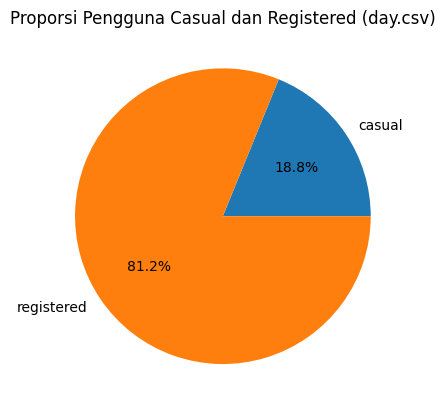

In [15]:
df_day[['casual', 'registered']].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporsi Pengguna Casual dan Registered (day.csv)')
plt.ylabel('')
plt.show()

Pertanyaan ke 4

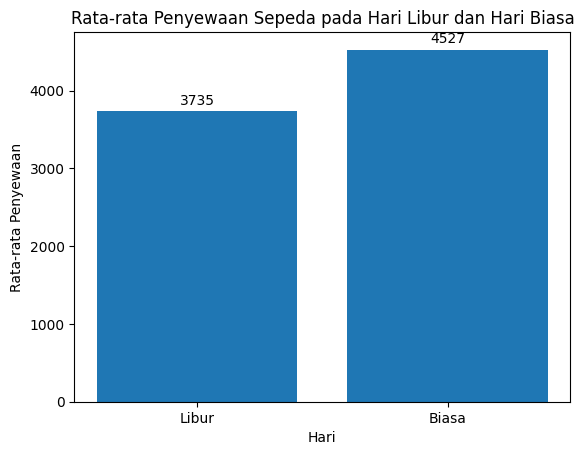

In [16]:
# Hitung rata-rata penyewaan sepeda untuk hari libur dan hari biasa
holiday_mean = df_day[df_day['holiday'] == 1]['cnt'].mean()
weekday_mean = df_day[df_day['holiday'] == 0]['cnt'].mean()

# Buat DataFrame untuk visualisasi
data = {'Hari': ['Libur', 'Biasa'], 'Rata-rata Penyewaan': [holiday_mean, weekday_mean]}
df_visualisasi = pd.DataFrame(data)

# Buat bar chart
plt.bar(df_visualisasi['Hari'], df_visualisasi['Rata-rata Penyewaan'])
plt.title('Rata-rata Penyewaan Sepeda pada Hari Libur dan Hari Biasa')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Penyewaan')

# Tampilkan nilai rata-rata di atas setiap bar
for i, v in enumerate(df_visualisasi['Rata-rata Penyewaan']):
    plt.text(i, v + 50, str(round(v)), ha='center', va='bottom')

plt.show()

## Analisis Lanjutan (Opsional)

**Clustering**

Jumlah penyewaan sepeda per kelompok waktu

Pagi: 06:00 - 12:00

Siang: 12:00 - 18:00

Sore: 18:00 - 24:00

Malam: 00:00 - 06:00

In [20]:
def group_by_time(hour):
    if 6 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 18:
        return 'Siang'
    elif 18 <= hour < 24:
        return 'Sore'
    else:
        return 'Malam'

df_hour['time_group'] = df_hour['hr'].apply(group_by_time)

time_group_rentals = df_hour.groupby('time_group')['cnt'].sum().reset_index()
print(time_group_rentals)

  time_group      cnt
0      Malam   106509
1       Pagi   907319
2      Siang  1292742
3       Sore   986109


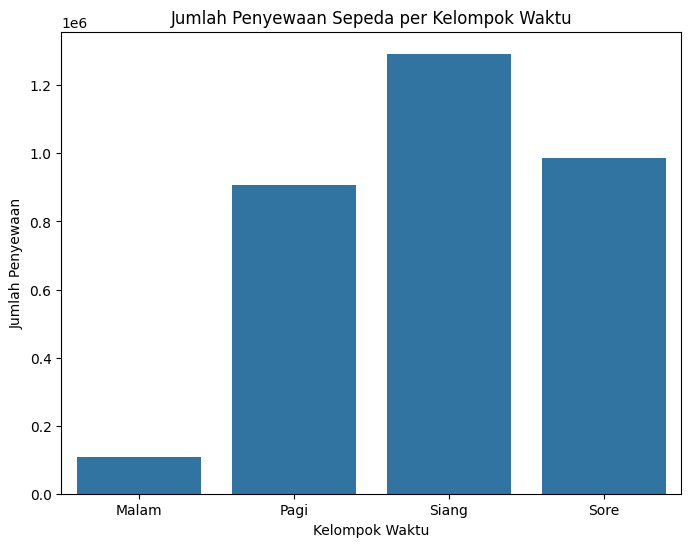

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='time_group', y='cnt', data=time_group_rentals)
plt.title('Jumlah Penyewaan Sepeda per Kelompok Waktu')
plt.xlabel('Kelompok Waktu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Penyewaan Sepeda Berdasarkan Kelompok Waktu: Grafik batang ini menunjukkan jumlah penyewaan sepeda yang dikelompokkan berdasarkan waktu dalam sehari: Malam, Pagi, Siang, dan Sore.

 Terlihat jelas bahwa terjadi peningkatan signifikan dalam jumlah penyewaan sepeda dari malam hingga siang hari.

 Jumlah penyewaan mencapai puncaknya pada siang hari, dengan jumlah penyewaan tertinggi dibandingkan kelompok waktu lainnya.

## Conclusion

Pertanyaan Bisnis:

Performa Penyewaan Sepeda dalam Beberapa Bulan Terakhir:

Kesimpulan: Jumlah penyewaan sepeda cenderung meningkat pada bulan-bulan musim panas (Juni, Juli, Agustus) dan menurun pada bulan-bulan musim dingin (Desember, Januari, Februari). To see

Kesimpulan: Musim gugur (Fall) memiliki jumlah penyewaan sepeda tertinggi, diikuti oleh musim panas (Summer), musim semi (Spring), dan terakhir musim dingin (Winter).

Kesimpulan: Mayoritas pengguna sepeda adalah pengguna registered (sekitar 80%), sedangkan pengguna casual hanya sekitar 20%.

Kesimpulan: Rata-rata penyewaan sepeda pada hari libur sedikit lebih rendah dibandingkan hari biasa.

In [45]:
df_merged.to_csv('bike_sharing_data_cleaned.csv', index=False)